In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from helper import sp_noise
import os

In [58]:
path, ext = os.path.splitext("img_in/jeremiah-amaya-z3wbTG64Gto-unsplash.jpg")
prob = 0.09
struct = (1/43) * np.array([
    [1,7,1],
    [7,11,7],
    [1,7,1]
])

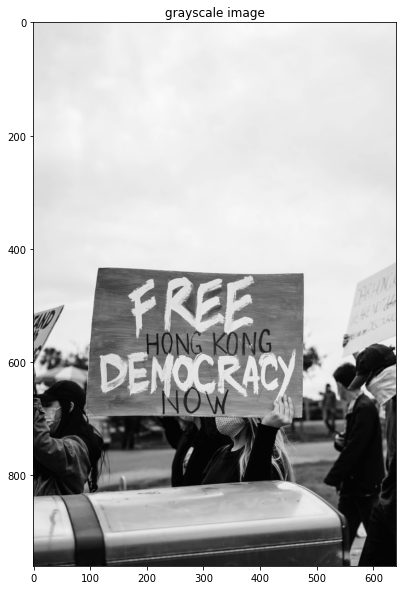

In [68]:
img = cv2.imread(path+ext,0)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.gray)
plt.title('grayscale image')
plt.show()

Text(0.5, 1.0, 'noisy image level 9.0%')

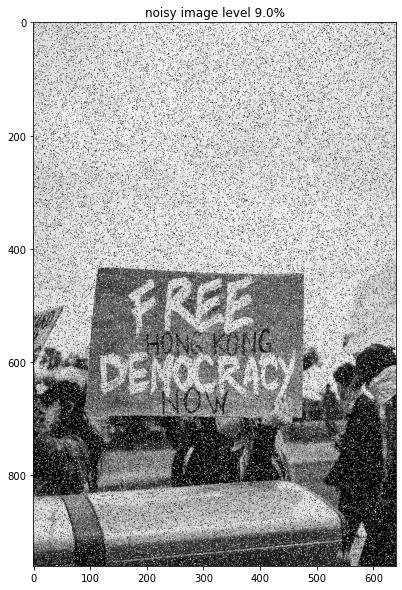

In [69]:
noisy_img = np.array(sp_noise(img, prob),dtype=np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(noisy_img, cmap=plt.cm.gray)
plt.title(f"noisy image level {prob*100}%")

In [70]:
def fir_image(image, weighted_window):
  return cv2.merge(list(map(lambda channel: fir(channel, weighted_window), cv2.split(image))))

def fir(image, weighted_window):
  h, w = image.shape
  window_h, window_w = weighted_window.shape
  new_image = np.zeros((h, w), np.uint8)
  new_image = cv2.filter2D(image, -1, weighted_window)
  return new_image

In [71]:
def MSE(img: np.ndarray, img_processing: np.ndarray) -> float:
    return np.sum((img - img_processing)**2)/(img.shape[0]*img.shape[1]*3)

In [72]:
fir_result = fir_image(noisy_img, struct)

In [73]:
def filtering_fft(image, kernel):
  
  s1 = np.array(image.shape)

  fsize = 2 ** np.ceil(np.log2(s1)).astype(int)
  fslice = tuple([slice(0, int(sz)) for sz in s1])

  image_fft = np.fft.fft2(image , fsize)

  kernel_fft = np.fft.fft2(kernel , fsize)
  result = np.fft.ifft2(image_fft * kernel_fft)[fslice].copy()

  return np.array(result.real , np.int32)

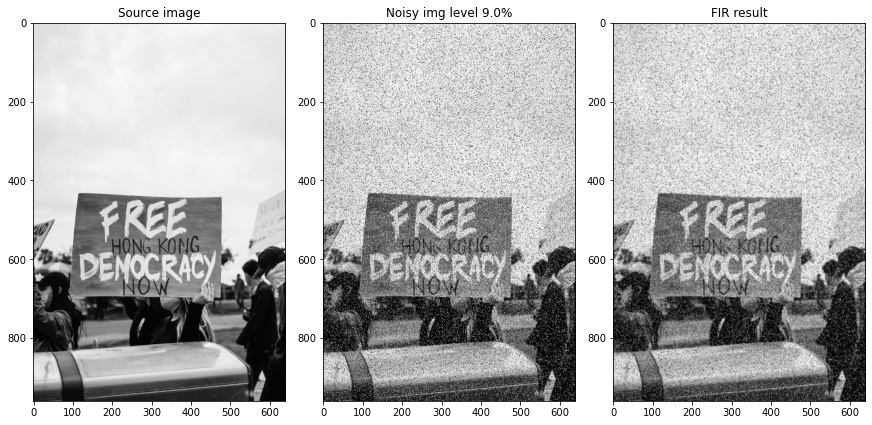

MSE for source image and noisy image: 6.287884114583333
MSE for source image and filtered image: 20.967012803819443


In [74]:
fig, axs = plt.subplots(1,3,figsize=(12,12), constrained_layout=True)
axs[0].imshow(img, cmap=plt.cm.gray)
axs[0].set_title("Source image")
axs[1].imshow(noisy_img, cmap=plt.cm.gray)
axs[1].set_title(f"Noisy img level {prob*100}%")
axs[2].imshow(fir_result, cmap=plt.cm.gray)
axs[2].set_title("FIR result")
plt.show()
print(f'MSE for source image and noisy image: {MSE(img, noisy_img)}')
print(f'MSE for source image and filtered image: {MSE(img, fir_result)}')

In [75]:
spectral =  filtering_fft(noisy_img, struct)

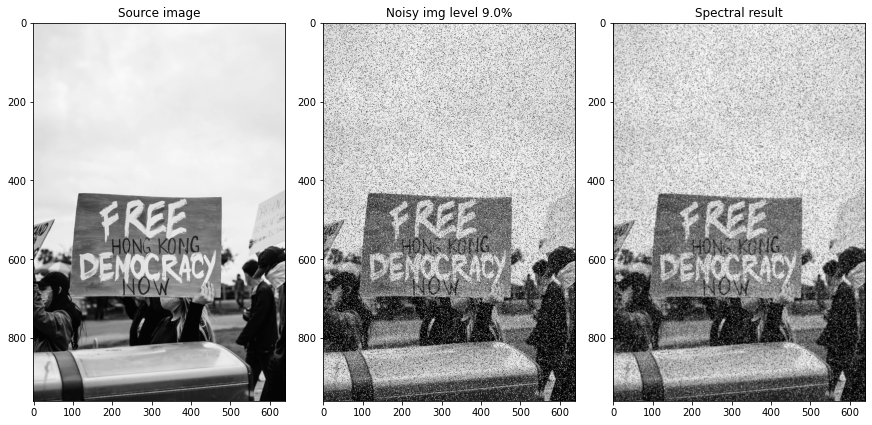

MSE for source image and noisy image: 6.287884114583333
MSE for source image and filtered image: 391.0087527126736


In [76]:
fig, axs = plt.subplots(1,3,figsize=(12,12), constrained_layout=True)
axs[0].imshow(img, cmap=plt.cm.gray)
axs[0].set_title("Source image")
axs[1].imshow(noisy_img, cmap=plt.cm.gray)
axs[1].set_title(f"Noisy img level {prob*100}%")
axs[2].imshow(spectral, cmap=plt.cm.gray)
axs[2].set_title("Spectral result")
plt.show()
print(f'MSE for source image and noisy image: {MSE(img, noisy_img)}')
print(f'MSE for source image and filtered image: {MSE(img, spectral)}')